In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.set_option("max_columns",250)

In [3]:
wnba = pd.read_csv("wnba.csv")

In [4]:
wnba

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,3,9,12,12,7,0,14,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,6,29,861,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,9,22,127,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,2,27,671,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,8,29,952,56,212,268,75,21,22,71,582,11,0


In [5]:
wnba.Experience.dtype

dtype('O')

In [6]:
wnba.Experience.unique()

array(['2', '12', '4', '6', 'R', '8', '5', '3', '1', '9', '10', '11', '7',
       '13', '14', '15'], dtype=object)

In [7]:
wnba.Experience.value_counts()#.dropna = false

R     23
3     19
6     14
5     14
1     12
9     11
4     11
2     11
10     5
12     4
11     4
7      4
8      3
13     3
14     3
15     2
Name: Experience, dtype: int64

In [8]:
pd.isnull(np.nan)

True

In [9]:
def category(x):
    if pd.isnull(x):
        return "Rookie"
    elif 0< x <= 3:
        return "Little Experience"
    elif 3< x <= 5:
        return "Experience"
    elif 5< x <= 10:
        return "Very Experience"
    elif x > 10:
        return "Veteran"

In [14]:
wnba["Exp_Experience"] = pd.to_numeric(wnba["Experience"],errors = "coerce").map(category)

value = wnba["Exp_Experience"].value_counts(normalize = True).iloc[[3,0,2,1,4]]

wnba["Exp_Experience"]

0      Little Experience
1                Veteran
2             Experience
3        Very Experience
4                 Rookie
             ...        
138      Very Experience
139      Very Experience
140    Little Experience
141      Very Experience
142    Little Experience
Name: Exp_Experience, Length: 143, dtype: object

# Nominal , Ordinal --> Bar or Pie chart

<AxesSubplot:title={'center':'No. players in WNBA by level of Experience'}>

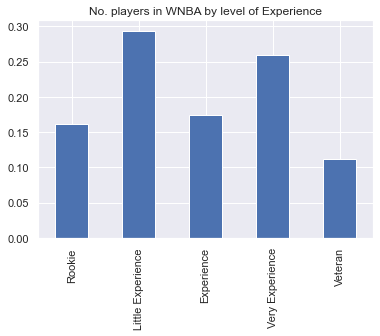

In [11]:
#Absolute Freq 

value.plot.bar(title = "No. players in WNBA by level of Experience")

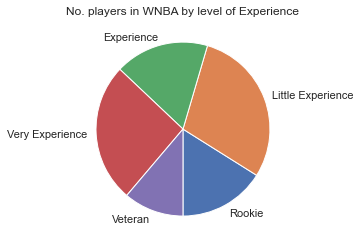

In [12]:
# rel Freq
value.plot.pie(title = "No. players in WNBA by level of Experience" , startangle = -90 )
plt.ylabel("")
plt.show()

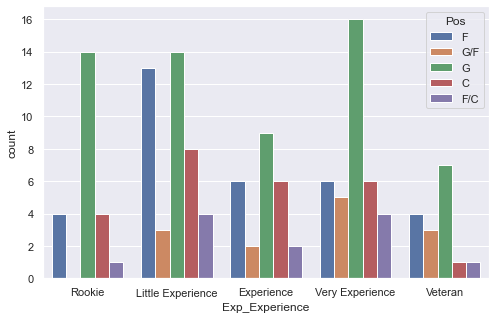

In [32]:
fig = plt.figure(figsize = (8,5))

sns.countplot(data = wnba , x = "Exp_Experience", hue = "Pos", order = ["Rookie","Little Experience","Experience","Very Experience","Veteran"])
plt.show()

In [24]:
wnba["MIN"].mean(),wnba["Age"].mean()

(496.97202797202794, 27.076923076923077)

In [27]:
wnba["min_mean_relative"] = wnba["MIN"].apply(lambda x: "Average or Above" if x >= 497 else "Below Average")
wnba[["MIN","min_mean_relative"]]

,MIN,min_mean_relative
0,173,Below Average
1,947,Average or Above
2,617,Average or Above
3,721,Average or Above
4,137,Below Average
...,...,...
138,861,Average or Above
139,127,Below Average
140,671,Average or Above
141,952,Average or Above


In [29]:
wnba["age_mean_relative"] = wnba["Age"].apply(lambda x: "Vetern" if x >= 27 else "Rookie")
wnba[["Age","age_mean_relative"]]

,Age,age_mean_relative
0,23,Rookie
1,35,Vetern
2,26,Rookie
3,28,Vetern
4,23,Rookie
...,...,...
138,27,Vetern
139,32,Vetern
140,32,Vetern
141,29,Vetern


<AxesSubplot:xlabel='age_mean_relative', ylabel='count'>

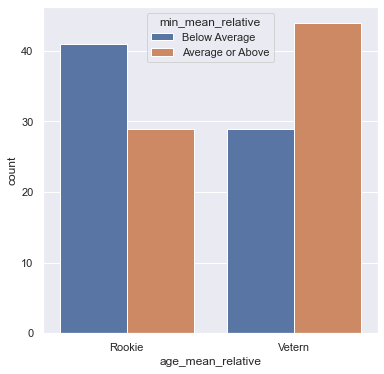

In [33]:
fig = plt.figure(figsize = (6,6))
sns.countplot(data = wnba , x = 'age_mean_relative',hue = "min_mean_relative")

In [34]:
lst = [4,6,8,15]
sum(lst)/len(lst)

8.25

In [35]:
lst = [1,2,3,27]
sum(lst)/len(lst)

8.25

In [36]:
15-4

11

In [37]:
27-1

26

In [38]:
# let 3 be Standard Deviation
8.25 + 3 , 8.25 - 3 # 66%

(11.25, 5.25)

In [39]:
8.25 + 6 , 8.25 - 6 # 96

(14.25, 2.25)

In [40]:
8.25 + 9 , 8.25 - 9 # 99.7

(17.25, -0.75)